# Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

**Web scraping** is one of a method that we can use to colleting the data from internet. At this project we try to scrap US Dollar (USD) to Indonesian Rupiah (IDR) Exchange Rate from Exchange-rates.org website. Exchange-rates.org is a currency and cryptocurrency converter tool and data provider used by millions of people across the globe every month published by MBH Media, Inc. To do this we will only use a couple default library from python and BeautifulSoup.

We will scrap 2 points from this site. One is the date and the other one is US Dollar (USD) to Indonesian Rupiah (IDR) exchange rate history, measures day-by-day change (in the last 6 months).

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use `.content` to see what we exactly get, here I slice it so it won't make our screen full of the HTML we get from the page.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex HTML, which actually contains the codes needed to show the webpages on our web browser. But we as humans are still confused about what and where we can use that piece of code, so here is where we use the beautifulsoup. Beautiful soup class will result in a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(soup.prettify()[1:500])

!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   USD to IDR exchange rate history
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   


## Finding the Right Key to Scrap the Data and Extracting the Right Information

Now we already have a tidier HTML, now we should search the lines that we want to use. Let's back to our web page first.

<img src="asset/image1.png">

The information that we need are the date and the US Dollar (USD) to Indonesian Rupiah (IDR) Exchange Rate each day, which contain in the table. To know which part of the code refer to that table, we can just move our cursor there, right click, and inspect element. Then we will see something like this. 

<img src="asset/image2.png">

From inspect element we know that we need to find the line table with class `baris-scroll`. We can use the `.find()` method at our beautifusoup object. Let's also call our object to see what we get. 

In [4]:
table = soup.find('table', attrs={'class':'history-rates-data'})
print(table.prettify()[1:750])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2023-04-12">
     April 12, 2023
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2023-04-12">
     2023-4-12
    </a>
   </td>
   <td>
    <span class="w">
     <span class="nowrap">
      <span class="currencySymbol">
       $
      </span>
      1 =
     </span>
     <span class="nowrap">
      <span class="currencySymbol">
       Rp
      </span>
      14,835
     </span>
    </span>
    <span class="n">
     <span cla


As we can see from the line we just extract, we get all the content we needed. Here are the keywords from HTML's table you need to know:
- The `<table>` tag is used to create a table in the HTML document.
- The `<th>` tag stand for table header/header cell.
- The `<tr>` tag stand for table row.
- The `<td>` tag stand for standard cell.
- The `<a>` tag links one page to another page.
- The `<span>` tag is used as a generic container of inline elements.
    
The `find()` function can help you to get the part of the HTML code that you needed. While most of the HTML is contained in many tags you can differentiate them with help of `attrs=`, you can insert anything in the `div` a the `attrs` to help you find the part you needed.

Now, we need to get 2 information, that is the date of time, and the US Dollar (USD) to Indonesian Rupiah (IDR) Exchange Rate. As you can read from the above code, the date is contained within `a` with class `n`, and the US Dollar (USD) to Indonesian Rupiah (IDR) Exchange Rate is contained within `span` with class `n`. 
    
Now I will introduce you to another useful function from beautiful soup, that's `find_all`. While the `find` function method is used for finding out the **first tag** with the specified name or id and returning an object of type bs4. The find_all method is used for finding out **all tags** with the specified tag name or id and returning them as a list of type bs4.

For example, I'll try to extract the first 5 data of date information from the HTML. You can use a slicer to help you.

In [5]:
table.find_all('a', attrs={'class':'n'})[:5]

[<a class="n" href="/exchange-rate-history/usd-idr-2023-04-12">2023-4-12</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-04-11">2023-4-11</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-04-10">2023-4-10</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-04-07">2023-4-7</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-04-06">2023-4-6</a>]

In [6]:
table.find_all('span', attrs={'class':'n'})[:5]

[<span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>14,835</span></span>,
 <span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>14,915</span></span>,
 <span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>14,950</span></span>,
 <span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>14,941</span></span>,
 <span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>14,931</span></span>]

As you can see get already get the necessary key to extract all the needed data. To get the only text information you can add `.text`. Remember you need to only get one piece of information before you use `.text` otherwise, it will return an error. Here is an example of how you use `.text`. 

In [7]:
table.find_all('a', attrs={'class':'n'})[0].text

'2023-4-12'

In [8]:
table.find_all('span', attrs={'class':'n'})[0].text

'$1 = Rp14,835'

Now we need to extract all the data automatically, you can do this manually at this part but if your data is too long I advise you to use a loop. I'll show you how to make looping for extracting the data, but before that let's check how long is our data to help our looping process. Since `find_all` will always return data in format list, we will use `len()` to check how long is our list.

In [9]:
row = table.find_all('a', attrs={'class':'n'})
row_length = len(row)
row_length

129

Now, we know the length of our data, now here is what we will do for the looping process. 

Here is what the looping does to scrap the information: 

- First, we need to establish a placeholder to receive the information that we scrap. 
- We named our placeholder `temp` and it's a list. 
- Then we will make a loop from one to the length of the table row, 
- We will find all cells of columns one and two which contain the date and the US Dollar (USD) to Indonesian Rupiah (IDR) Exchange Rate. 
- Then we will append it to the tuple that we prepared before, 
- every iteration will scrap one line of the table.  

In [10]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #scrapping process
    #get date 
    date = table.find_all('a', attrs={'class':'n'})[i].text
    
    #get rupiah
    USDtoRupiah = table.find_all('span', attrs={'class':'n'})[i].text
    USDtoRupiah = USDtoRupiah.strip() #to remove excess white space
    
    temp.append((date,USDtoRupiah)) 
    
temp[:10]

[('2023-4-12', '$1 = Rp14,835'),
 ('2023-4-11', '$1 = Rp14,915'),
 ('2023-4-10', '$1 = Rp14,950'),
 ('2023-4-7', '$1 = Rp14,941'),
 ('2023-4-6', '$1 = Rp14,931'),
 ('2023-4-5', '$1 = Rp14,960'),
 ('2023-4-4', '$1 = Rp14,957'),
 ('2023-4-3', '$1 = Rp14,922'),
 ('2023-3-31', '$1 = Rp14,969'),
 ('2023-3-30', '$1 = Rp15,024')]

At this point, we can input it to a pandas' DataFrame and do the usual data analysis, but if you notice the original webpage give us reversed information. To do a further analysis let's reverse our list we can use `::-1` to do that. 

In [11]:
temp = temp[::-1]
temp[:10]

[('2022-10-14', '$1 = Rp15,472'),
 ('2022-10-17', '$1 = Rp15,441'),
 ('2022-10-18', '$1 = Rp15,474'),
 ('2022-10-19', '$1 = Rp15,587'),
 ('2022-10-20', '$1 = Rp15,562'),
 ('2022-10-21', '$1 = Rp15,537'),
 ('2022-10-24', '$1 = Rp15,598'),
 ('2022-10-25', '$1 = Rp15,533'),
 ('2022-10-26', '$1 = Rp15,503'),
 ('2022-10-27', '$1 = Rp15,560')]

## Creating Dataframe and Data Wrangling

Then after we fix our list a bit, as usual we will input it into `pandas` dataframe.

In [12]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Date','USDtoIDR'))
df.head()

,Date,USDtoIDR
0,2022-10-14,"$1 = Rp15,472"
1,2022-10-17,"$1 = Rp15,441"
2,2022-10-18,"$1 = Rp15,474"
3,2022-10-19,"$1 = Rp15,587"
4,2022-10-20,"$1 = Rp15,562"


We need to check the data type first to before wrangling the data using `.dtypes`

In [13]:
df.dtypes

Date        object
USDtoIDR    object
dtype: object

As we can see, the data doesn't have the data type we want, we need to change the data type to the right type. But before we can do that we need to remove character `$1`, `=`, and `Rp` first.

In [14]:
df["USDtoIDR"] = [' '.join([item for item in x.split() 
                    if item not in ['$1', '=']]) 
                    for x in df["USDtoIDR"]]
df["USDtoIDR"] = df["USDtoIDR"].str.replace('Rp', '')
df["USDtoIDR"] = df["USDtoIDR"].str.replace(',', '')
df["USDtoIDR"] = df["USDtoIDR"].astype('int64')
df["Date"] = df["Date"].astype('datetime64')
df.head()

,Date,USDtoIDR
0,2022-10-14,15472
1,2022-10-17,15441
2,2022-10-18,15474
3,2022-10-19,15587
4,2022-10-20,15562


In [15]:
df.dtypes

Date        datetime64[ns]
USDtoIDR             int64
dtype: object

After that, we also need to check whether there are missing values in the data frame.

In [16]:
df.isna().sum()

Date        0
USDtoIDR    0
dtype: int64

To make our plot behave like we want, we need to set the index of our data frame to our time column. We can use `set_index()`

In [17]:
df = df.set_index('Date')
df.head()

,USDtoIDR
Date,
2022-10-14,15472
2022-10-17,15441
2022-10-18,15474
2022-10-19,15587
2022-10-20,15562


And done, We can do our simple visualization to put the cherry on top.

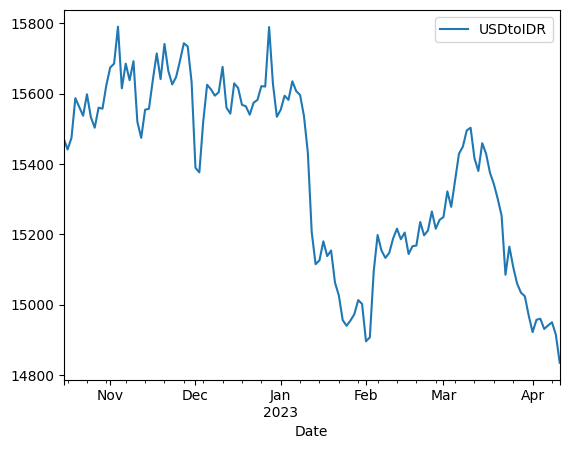

In [18]:
df.plot();

Lastly, I would like to know the lowest and highest US Dollar (USD) Exchange Rate to Indonesian Rupiah (IDR).

In [19]:
# The lowest exchange rate
df.sort_values(by='USDtoIDR',ascending=True).head(1)

,USDtoIDR
Date,
2023-04-12,14835


In [20]:
# The highest exchange rate
df.sort_values(by='USDtoIDR',ascending=False).head(1)

,USDtoIDR
Date,
2022-11-03,15790


## Conclusion

From the graph above, It can be seen that since entering 2023, the exchange rate of the US Dollar (USD) against the Indonesian Rupiah (IDR) has tended to decrease. The exchange rate increased in February but decreased again in March until now. During the last 6 months, the lowest exchange rate occurred on April 12, 2023, which was IDR 14,835 and the highest exchange rate occurred on November 3, 2022, IDR 15,790. According to Bank Indonesia's statement on CNN Indonesia (https://www.cnbcindonesia.com/market/20230411144537-17-428993/rupiah-belum-terbendung-dekati-rekor-terkuat-2023), this occurred because Indonesia's foreign exchange reserves continued to increase. In addition, the current health of the US economy is also declining.